In [1]:
import os
import datetime
import logging
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import folium

os.chdir('..')

from src.config import FOLIUM_CFG
from src.data.arpa.arpa_quality_raw_funcs import ArpaConnect, get_city_sensor_ids
from src.visualization.create_map import display_station_map
from src.visualization.visualize import display_timestamp, display_plotly_timestamp, display_year_on_year_avg_pollutant
from src.data.common_funcs import load_dataset, load_normalized_dataset


In [2]:
FOLIUM_CFG.update({'zoom_start': 12})

In [2]:
arpa = ArpaConnect()
sensor_data = get_city_sensor_ids(arpa=arpa, city='Milano')
m = folium.Map(**FOLIUM_CFG)

Connected with Socrata backend for recent data
Download from Socrata dataset ib47-atvt with kwargs {'where': "comune = 'Milano' and datastop IS NULL", 'order': 'idsensore'}


## Is really covid-19 containment affecting pollutant levels?
# A short analysis for Milan, Italy

I selected open data from ARPA Lombardia, the regional weather agency, available at sensor level. Here's a map for sensor stations located in the city of Milan.
By clicking on the marker a popup will show which sensors are present on the selected station, and which pollutant is measured by the sensor. 

In [3]:
display_station_map(folium_map=m, sensor_registry=sensor_data)

In [8]:
selected_sensors = sensor_data.loc[sensor_data['nometiposensore']=='Biossido di Azoto', 'idsensore'].drop_duplicates().tolist()

In [9]:
raw_data = load_dataset()
selected_raw_data = raw_data[raw_data['idsensore'].isin(selected_sensors)]
last_year_selected_raw_data = selected_raw_data[selected_raw_data['data'].dt.year>=2020]
lines_last_year_selected_raw_data = last_year_selected_raw_data.pivot_table(index='data', columns='idsensore', values='valore').reset_index()
lines_last_year_selected_raw_data['average'] = lines_last_year_selected_raw_data[selected_sensors].mean(axis=1)

loading dataset from C:\Users\aricca\Documents\covid-pollution-effect\data\processed\dataset.pkl


Selecting NO2

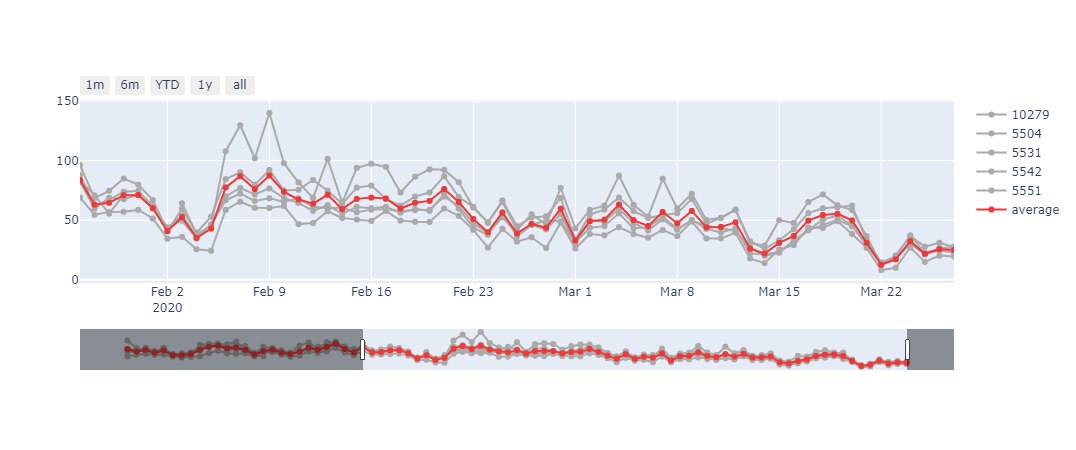

In [10]:
display_plotly_timestamp(lines=lines_last_year_selected_raw_data, color_only_average=True)

C:\Users\aricca\Documents\covid-pollution-effect\src\visualization\visualize.py:135: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



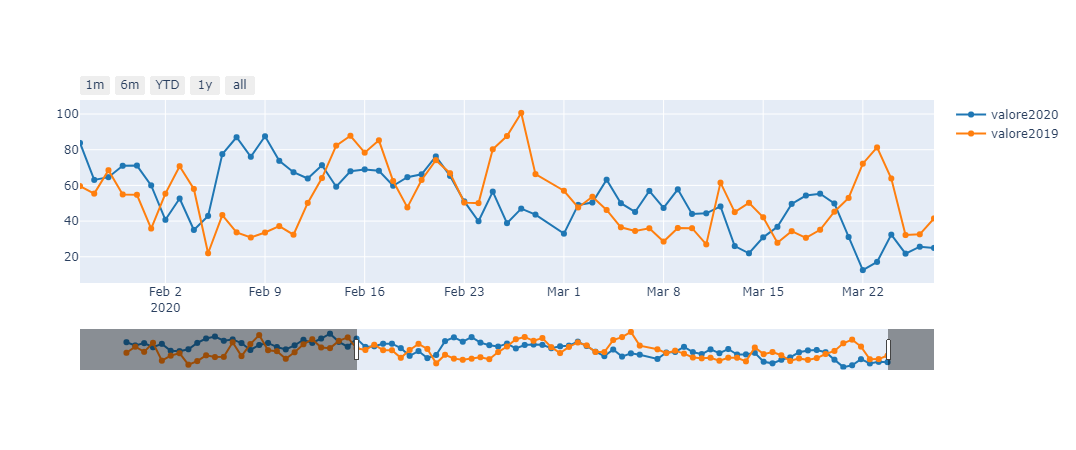

In [11]:
display_year_on_year_avg_pollutant(data=selected_raw_data, comp_year=2019)

In [12]:
norm_data = load_normalized_dataset()
selected_norm_data = norm_data[norm_data['idsensore'].isin(selected_sensors)]
last_year_selected_norm_data = selected_norm_data[selected_norm_data['data'].dt.year>=2020]
lines_last_year_selected_norm_data = last_year_selected_norm_data.pivot_table(index='data', columns='idsensore', values='valore').reset_index()
lines_last_year_selected_norm_data['average'] = lines_last_year_selected_norm_data[selected_sensors].mean(axis=1)

loading normalized dataset from C:\Users\aricca\Documents\covid-pollution-effect\data\processed\normalized_dataset.pkl


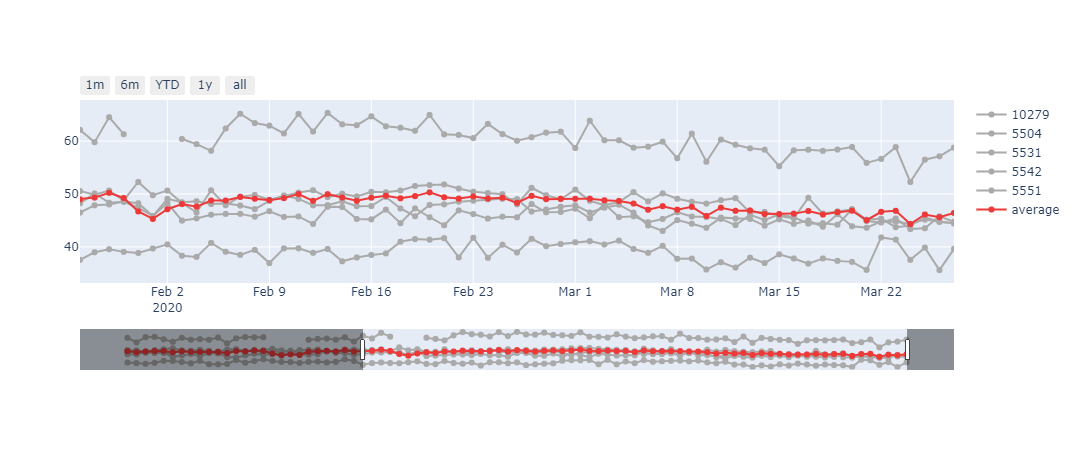

In [13]:
display_plotly_timestamp(lines=lines_last_year_selected_norm_data, color_only_average=True)

C:\Users\aricca\Documents\covid-pollution-effect\src\visualization\visualize.py:135: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



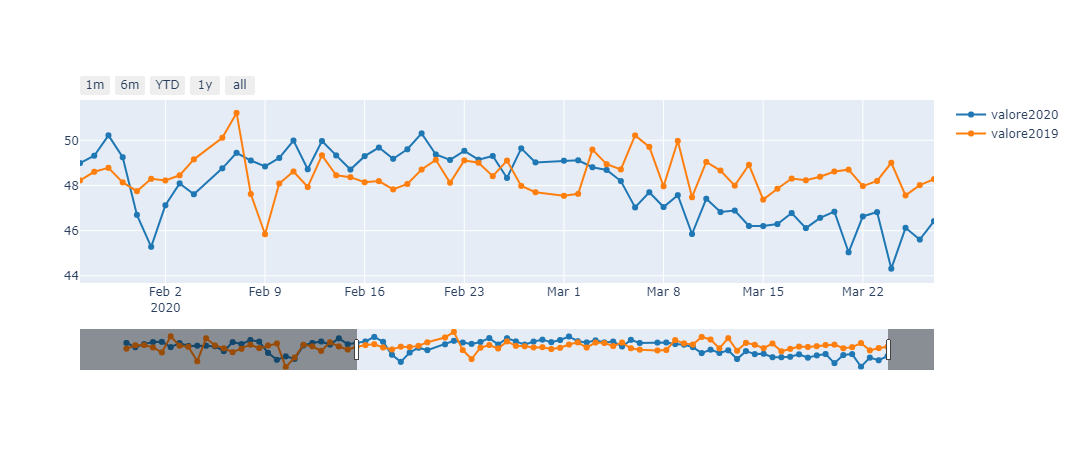

In [14]:
display_year_on_year_avg_pollutant(data=selected_norm_data, comp_year=2019)